# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

from nltk import word_tokenize
from nltk import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [4]:
def jaccard_similarity(d1, d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter / union

In [5]:
d1 = 'Think like a man of action and act like man of thought.'
d2 = 'Try not to become a man of success but rather try to become a man of value.'
d3 = 'Give me liverty, of give me death'

print(jaccard_similarity(d1, d2))
print(jaccard_similarity(d1, d3))
print(jaccard_similarity(d2, d3))

0.2222222222222222
0.06666666666666667
0.058823529411764705


In [11]:
tiv = TfidfVectorizer()
corpus = [d1, d2, d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(tfidf[0], tfidf[1]))
print(cosine_similarity(tfidf[0], tfidf[2]))
print(cosine_similarity(tfidf[1], tfidf[2]))

[[0.22861951]]
[[0.06083323]]
[[0.04765587]]


## 한국어 형태소 분석기 설치

In [16]:
!pip install konlpy


     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 448 kB 34.9 MB/s 
     |████████████████████████████████| 86 kB 4.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [18]:
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

Installing automake (A dependency for mecab-ko)
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:10 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:12 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/deadsna

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [26]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()
print(raw[:5])

[b'id\tdocument\tlabel\n', b'8112052\t\xec\x96\xb4\xeb\xa6\xb4\xeb\x95\x8c\xeb\xb3\xb4\xea\xb3\xa0 \xec\xa7\x80\xea\xb8\x88\xeb\x8b\xa4\xec\x8b\x9c\xeb\xb4\x90\xeb\x8f\x84 \xec\x9e\xac\xeb\xb0\x8c\xec\x96\xb4\xec\x9a\x94\xe3\x85\x8b\xe3\x85\x8b\t1\n', b'8132799\t\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb8\xec\x9d\x84 \xeb\xb0\xb0\xec\x9a\xb0\xeb\x8a\x94 \xed\x95\x99\xec\x83\x9d\xec\x9c\xbc\xeb\xa1\x9c, \xec\x99\xb8\xea\xb5\xad\xeb\x94\x94\xec\x9e\x90\xec\x9d\xb4\xeb\x84\x88\xec\x99\x80 \xea\xb7\xb8\xeb\x93\xa4\xec\x9d\xb4 \xec\x9d\xbc\xea\xb5\xb0 \xec\xa0\x84\xed\x86\xb5\xec\x9d\x84 \xed\x86\xb5\xed\x95\xb4 \xeb\xb0\x9c\xec\xa0\x84\xed\x95\xb4\xea\xb0\x80\xeb\x8a\x94 \xeb\xac\xb8\xed\x99\x94\xec\x82\xb0\xec\x97\x85\xec\x9d\xb4 \xeb\xb6\x80\xeb\x9f\xac\xec\x9b\xa0\xeb\x8a\x94\xeb\x8d\xb0. \xec\x82\xac\xec\x8b\xa4 \xec\x9a\xb0\xeb\xa6\xac\xeb\x82\x98\xeb\x9d\xbc\xec\x97\x90\xec\x84\x9c\xeb\x8f\x84 \xea\xb7\xb8 \xec\x96\xb4\xeb\xa0\xa4\xec\x9a\xb4\xec\x8b\x9c\xec\xa0\x88\xec\x97\x90 \xeb\x81\x9d

In [27]:
raw = [x.decode() for x in raw[1:10000]]

reviews = []
for i in raw:
  reviews.append(i.split('\t')[1])

print(reviews[:5])

['어릴때보고 지금다시봐도 재밌어요ㅋㅋ', '디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업이 부러웠는데. 사실 우리나라에서도 그 어려운시절에 끝까지 열정을 지킨 노라노 같은 전통이있어 저와 같은 사람들이 꿈을 꾸고 이뤄나갈 수 있다는 것에 감사합니다.', '폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.', '와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런게 진짜 영화지', '안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.']


In [28]:
from konlpy.tag import Mecab
tagger = Mecab()

reviews = [tagger.morphs(x) for x in reviews]

print(reviews)

[['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지'], ['안개', '자욱', '한', '밤하늘', '에', '떠', '있', '는', '초승달', '같', '은', '영화', '.'], ['사랑', '을', '해', '본', '사람', '이', '라면', '처음', '부터', '끝', '까지', '웃', '을', '수', '있', '는', '영화'], ['완전', '감동', '입니다', '다시', '봐도', '감동'], ['개', '들', '의', '전쟁', '2', '나오', '나요', '?', '나오', '면', '1', '빠', '로', '보', '고', '싶', '음'

## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [31]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [32]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [33]:
word2vec.most_similar('영화')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('마음', 0.9618596434593201),
 ('이야기', 0.9583257436752319),
 ('작품', 0.9568454027175903),
 ('듯', 0.9531741142272949),
 ('밝', 0.952168345451355),
 ('모습', 0.9503317475318909),
 ('에게', 0.9489200711250305),
 ('삶', 0.9479119777679443),
 ('현실', 0.9474656581878662),
 ('사랑', 0.9449743032455444)]

* t-sne을 이용한 단어 벡터 시각화

In [34]:
tsne = TSNE(n_components=2) #n_component : 차원
tsne

TSNE(angle=0.5, early_exaggeration=12.0, init='random', learning_rate=200.0,
     method='barnes_hut', metric='euclidean', min_grad_norm=1e-07,
     n_components=2, n_iter=1000, n_iter_without_progress=300, n_jobs=None,
     perplexity=30.0, random_state=None, verbose=0)

In [35]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


array([[ 0.07194348, -0.15378618,  0.1359977 , ..., -0.15164095,
        -0.06475285, -0.04910129],
       [-0.20695086, -0.5332868 ,  0.20148991, ..., -0.46887165,
        -0.2683101 ,  0.04320879],
       [-0.43997622, -0.95968115,  0.15990913, ..., -1.0073314 ,
        -0.00106726, -0.30556825],
       ...,
       [ 0.00881974, -0.01489091,  0.0186139 , ..., -0.01532069,
        -0.02154711, -0.01037833],
       [ 0.00869253,  0.00328517,  0.00849027, ..., -0.01417107,
        -0.0418212 ,  0.00102856],
       [-0.00668865, -0.0055805 ,  0.0049149 , ..., -0.01778104,
        -0.03325234, -0.01015141]], dtype=float32)

In [36]:
import pandas as pd

transform_similarity = tsne.fit_transform(similarity) # 2챠원으로 fitting
df = pd.DataFrame(transform_similarity, index=vocab, columns=['x','y']) #x,y(2차원)으로 변형해주었으니, 이를 좌표로 시각화 가능
df[:10]

,x,y
어릴,-23.339628,-34.797653
때,13.694228,-63.722794
보,17.700045,-68.934502
고,16.781961,-68.163589
지금,14.688070,-67.569778
다시,15.870044,-68.653885
봐도,14.242019,-69.460922
재밌,6.520919,-75.645981
어요,5.237558,-75.256866
ㅋㅋ,3.150215,-76.790840


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


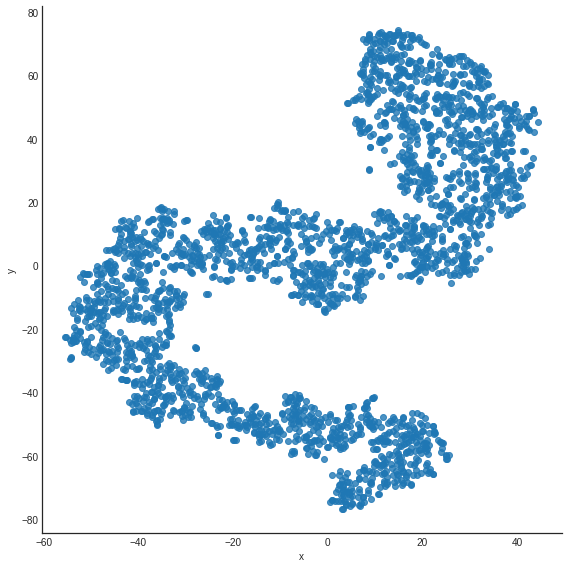

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x','y',data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [41]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters=6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([0, 2, 2, ..., 1, 1, 1])

In [42]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-23.339628,-34.797653,0
때,13.694228,-63.722794,2
보,17.700045,-68.934502,2
고,16.781961,-68.163589,2
지금,14.688070,-67.569778,2
다시,15.870044,-68.653885,2
봐도,14.242019,-69.460922,2
재밌,6.520919,-75.645981,2
어요,5.237558,-75.256866,2
ㅋㅋ,3.150215,-76.790840,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


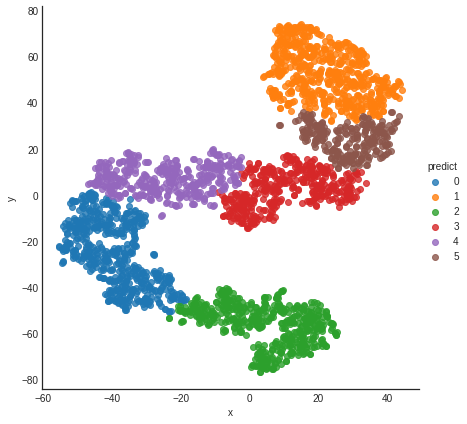

In [44]:
sns.lmplot('x','y',data=df, fit_reg=False, size=6, hue='predict')
plt.show()

#### average

In [45]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([0, 2, 2, ..., 1, 1, 1])

In [46]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-23.339628,-34.797653,0
때,13.694228,-63.722794,2
보,17.700045,-68.934502,2
고,16.781961,-68.163589,2
지금,14.688070,-67.569778,2
다시,15.870044,-68.653885,2
봐도,14.242019,-69.460922,2
재밌,6.520919,-75.645981,2
어요,5.237558,-75.256866,2
ㅋㅋ,3.150215,-76.790840,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


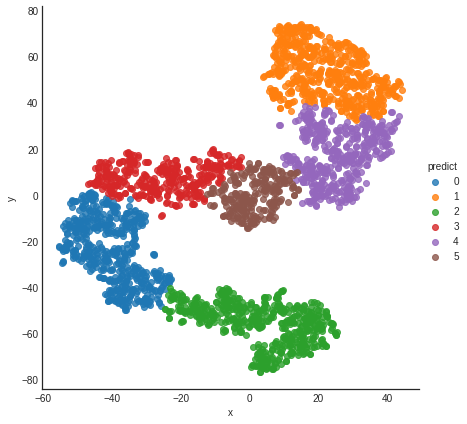

In [47]:
sns.lmplot('x','y',data=df, fit_reg=False, size=6, hue='predict')
plt.show()

#### complete

In [48]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([4, 3, 3, ..., 5, 5, 5])

In [49]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-23.339628,-34.797653,4
때,13.694228,-63.722794,3
보,17.700045,-68.934502,3
고,16.781961,-68.163589,3
지금,14.688070,-67.569778,3
다시,15.870044,-68.653885,3
봐도,14.242019,-69.460922,3
재밌,6.520919,-75.645981,3
어요,5.237558,-75.256866,3
ㅋㅋ,3.150215,-76.790840,3


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


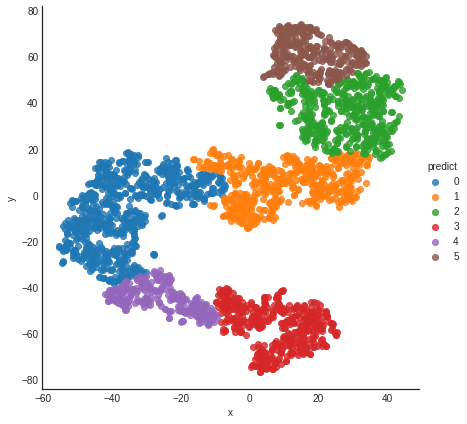

In [50]:
sns.lmplot('x','y',data=df, fit_reg=False, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [54]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,2599,2600,2601,2602,2603,2604,2605,2606,2607,2608,2609,2610,2611,2612,2613,2614,2615,2616,2617,2618,2619,2620,2621,2622,2623,2624,2625,2626,2627,2628,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,47.001811,53.390815,52.192218,50.210736,51.813539,51.136312,50.608677,49.543956,49.660241,52.305564,45.289443,52.047857,46.959216,46.927938,47.041058,84.462375,45.966294,49.226573,48.929351,48.794962,111.498625,52.533026,43.698399,54.091225,48.503421,34.572963,50.605061,44.019771,18.087236,47.358653,33.375472,46.693799,42.265412,64.532389,34.822974,46.740644,44.841682,37.031362,34.720111,...,97.629023,72.039384,75.784705,107.959138,99.652741,84.976114,77.333824,83.349206,88.160377,110.980073,71.419186,89.880761,81.993645,102.672903,95.012063,108.409510,99.505795,115.129062,88.934047,79.172206,106.983717,97.946496,91.045584,34.103375,67.560426,93.050852,103.576694,97.421401,72.879806,91.078863,77.076917,100.308936,35.548879,107.493119,93.205098,104.735584,103.081685,108.229145,115.523112,113.999191
1,47.001811,0.000000,6.573315,5.408767,3.973288,5.389790,5.764217,13.914696,14.302101,16.791369,13.225857,15.137924,12.953644,85.225651,11.663996,15.326164,89.106644,14.975347,14.235809,14.399052,11.297336,130.441814,95.794190,80.816246,7.960615,10.005768,81.380192,10.854743,7.945271,31.695775,10.638458,13.728153,13.068541,6.084995,76.783979,12.797786,13.263380,2.564589,14.616040,81.371351,...,116.507908,80.674110,93.309042,127.332616,123.328589,100.511488,89.395861,102.257355,98.758572,132.817425,81.500853,107.575645,96.559964,126.116972,112.293427,130.570330,116.049374,136.598104,108.514755,101.344433,126.154263,119.749826,108.314481,80.833787,76.213179,108.855449,124.630348,117.882961,81.256175,108.610153,91.974850,121.980978,54.911399,128.411012,103.526755,128.316897,123.762528,131.647833,137.957722,137.553494
2,53.390815,6.573315,0.000000,1.198825,3.306729,1.851391,3.497865,13.039049,13.974472,16.535405,14.564709,19.303783,14.385795,91.698358,15.381590,18.949479,93.084821,18.940987,17.060372,17.344934,14.209775,135.404272,102.360933,87.267965,5.551833,13.048964,87.739025,9.729635,11.328324,37.587310,14.211684,20.025854,16.833707,11.429910,81.757451,19.370671,17.007356,8.550979,20.739826,87.656302,...,121.563354,85.230251,98.478355,132.354689,128.747963,105.420625,94.130064,107.444863,103.216127,138.026269,86.181981,112.605801,101.427808,131.500967,117.239927,135.820000,120.895085,141.753707,113.701091,106.806856,131.165718,125.035868,113.299473,87.263712,80.864020,113.701112,129.819767,123.067208,85.775156,113.615943,96.932777,127.241024,60.915673,133.564712,107.895469,133.699929,128.925006,136.999166,143.191572,142.886308
3,52.192218,5.408767,1.198825,0.000000,2.176463,1.035366,2.852084,12.699416,13.549458,16.132389,14.355113,18.643343,14.156431,90.587944,14.765247,18.383430,92.557271,18.313861,16.618836,16.884888,13.716107,134.677665,101.199963,86.165282,5.761662,12.513086,86.541358,9.357975,10.317476,36.413897,13.604821,18.827341,16.224532,10.260235,81.020393,18.204398,16.403537,7.352155,19.712439,86.460923,...,120.815079,84.582146,97.702168,131.614792,127.919007,104.702081,93.446811,106.665924,102.592664,137.245578,85.508014,111.862052,100.717487,130.680295,116.514881,135.030005,120.192223,140.985154,112.923169,105.966086,130.428032,124.236812,112.565635,86.065817,80.194946,112.997391,129.042731,122.290694,85.134920,112.877627,96.202334,126.447996,59.939167,132.795931,107.291305,132.879641,128.153873,136.186326,142.405666,142.078076
4,50.210736,3.973288,3.306729,2.176463,0.000000,1.603854,1.943035,11.485965,12.182097,14.769905,15.116803,18.477361,14.887571,89.101647,14.744407,18.422851,92.522497,18.224180,16.928662,17.155378,13.967444,134.207736,99.509299,84.707144,7.356790,12.703417,84.537550,8.172490,8.183490,34.291203,13.624385,16.842712,16.197971,8.132665,80.542824,16.543667,16.386108,5.438641,18.5862

* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

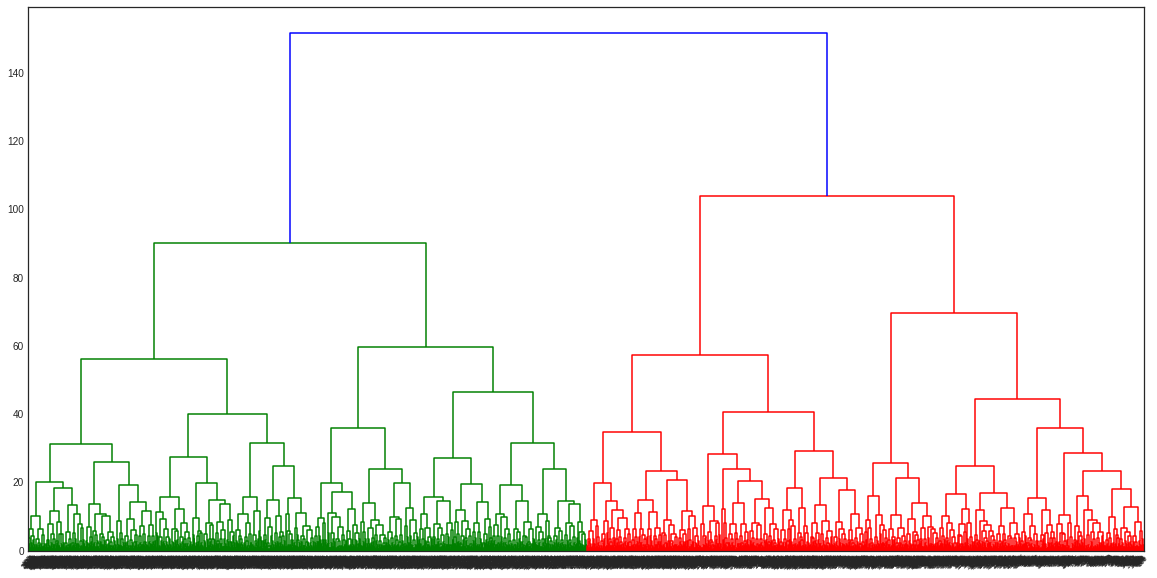

In [56]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,10))
dendrogram(row_clusters, 
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

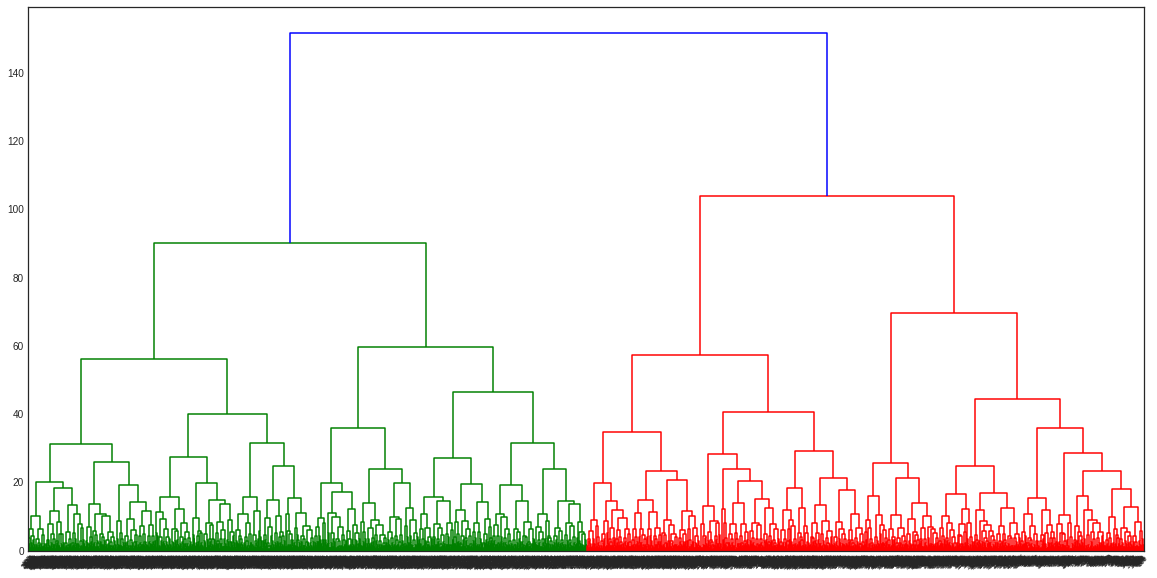

In [57]:
margings = linkage(df, method='complete')
plt.figure(figsize=(20,10))

dendrogram(margings, 
           leaf_rotation=50,
           leaf_font_size=7)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, 클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [58]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict = kmeans.fit_predict(df)
predict

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [59]:
results  = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-23.339628,-34.797653,2
때,13.694228,-63.722794,2
보,17.700045,-68.934502,2
고,16.781961,-68.163589,2
지금,14.688070,-67.569778,2
다시,15.870044,-68.653885,2
봐도,14.242019,-69.460922,2
재밌,6.520919,-75.645981,2
어요,5.237558,-75.256866,2
ㅋㅋ,3.150215,-76.790840,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


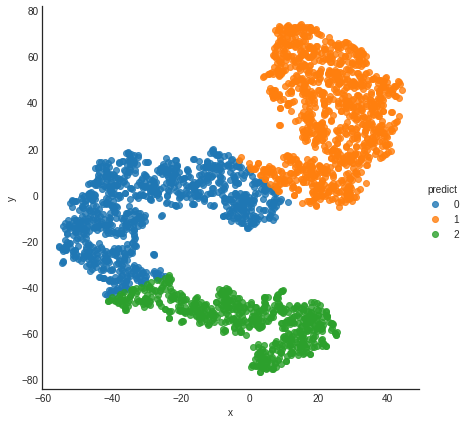

In [60]:
sns.lmplot('x','y',data=results, fit_reg=False, size=6, hue='predict')
plt.show()

### 클러스터 개수 6

In [61]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 2, 2, ..., 1, 1, 1], dtype=int32)

In [62]:
results  = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-23.339628,-34.797653,4
때,13.694228,-63.722794,2
보,17.700045,-68.934502,2
고,16.781961,-68.163589,2
지금,14.688070,-67.569778,2
다시,15.870044,-68.653885,2
봐도,14.242019,-69.460922,2
재밌,6.520919,-75.645981,2
어요,5.237558,-75.256866,2
ㅋㅋ,3.150215,-76.790840,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


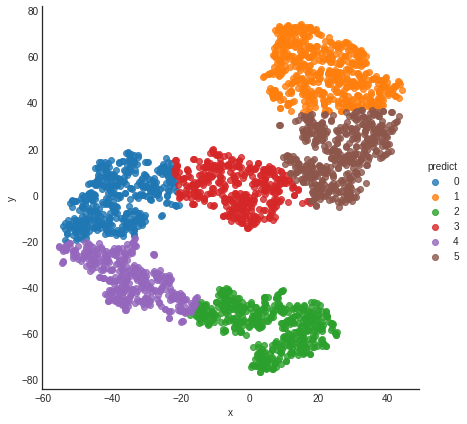

In [63]:
sns.lmplot('x','y',data=results, fit_reg=False, size=6, hue='predict')
plt.show()